Problem Statement: Data Wrangling II
Create an “Academic performance” dataset of students and perform the following
operations using Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values
and/or inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable
techniques to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this
transformation should be one of the following reasons: to change the scale for
better understanding of the variable, to convert a non-linear relation into a linear
one, or to decrease the skewness and convert the distribution into a normal
distribution. Reason and document your approach properly

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
url = r"C:\Users\Rutuja Habib\Downloads\Academic_performance.csv"
df = pd.read_csv(url)
df

,Student_ID,Age,Gender,Logical_Reasoning,Quantitative_Analysis,Comprehension
0,1,16.0,Female,78.0,82.0,85.0
1,2,17.0,Male,85.0,88.0,80.0
2,3,15.0,Female,92.0,75.0,90.0
3,4,18.0,Male,60.0,NaN,78.0
4,5,19.0,Female,73.0,90.0,88.0
5,6,NaN,Male,NaN,85.0,75.0
6,7,17.0,Female,95.0,40.0,95.0
7,8,20.0,Male,89.0,95.0,NaN
8,9,15.0,Female,88.0,87.0,65.0
9,10,16.0,Male,55.0,98.0,99.0


Scanning for NULL Values

In [25]:
print("The Missing Values:")
print(df.isnull().sum())

The Missing Values:
Student_ID               0
Age                      2
Gender                   0
Logical_Reasoning        2
Quantitative_Analysis    2
Comprehension            1
dtype: int64


df['Age'] = df['Age'].fillna(df['Age'].median())
df['Logical_Reasoning'] = df['Logical_Reasoning'].fillna(df['Logical_Reasoning'].mean())
df['Quantitative_Analysis'] = df['Quantitative_Analysis'].fillna(df['Quantitative_Analysis'].mean())
df['Comprehension'] = df['Comprehension'].fillna(df['Comprehension'].mean())
print("\nAfter filling in the NULL Values:")
df

In [26]:
print(df.isnull().sum())

Student_ID               0
Age                      2
Gender                   0
Logical_Reasoning        2
Quantitative_Analysis    2
Comprehension            1
dtype: int64


Creating the Boxplots for the columns and detect the
outliers


Outlier Detection:


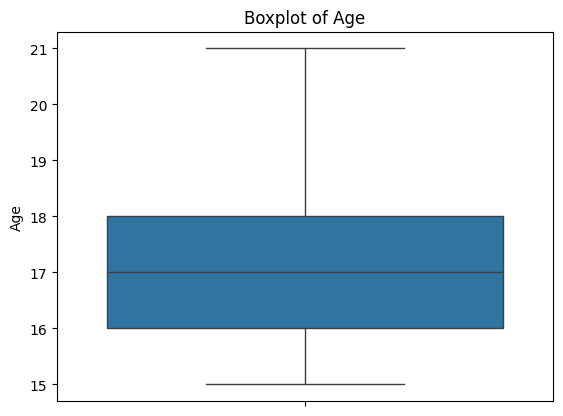

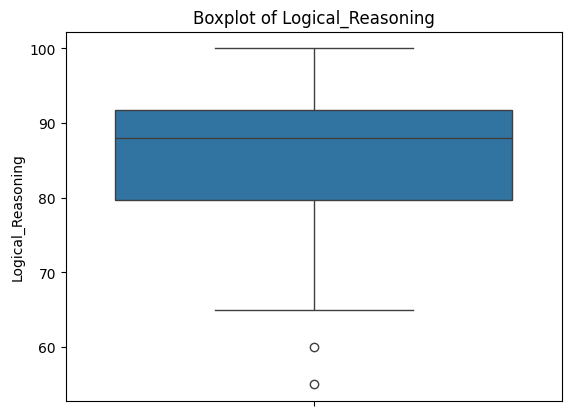

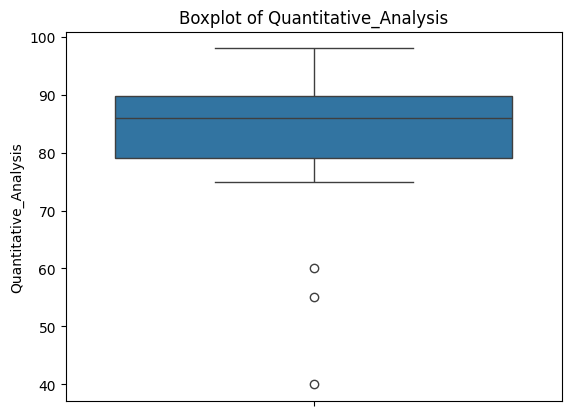

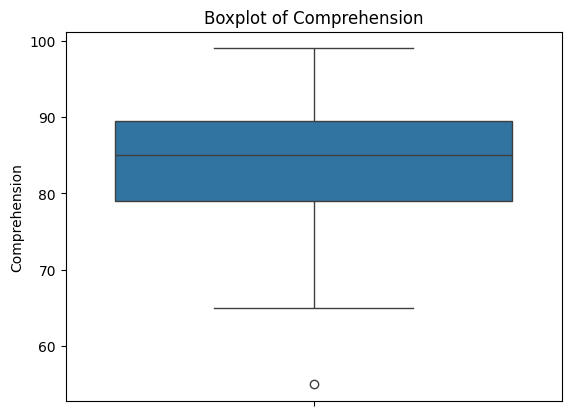

In [27]:
print("\nOutlier Detection:")
for column in ['Age', 'Logical_Reasoning', 'Quantitative_Analysis', 'Comprehension']:
    sns.boxplot(df[column])
    plt.title(f"Boxplot of {column}")
    plt.show()

Handling the Outliers using the IQR Method

In [28]:
def handle_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

# Apply to selected columns
for column in ['Age', 'Logical_Reasoning', 'Quantitative_Analysis', 'Comprehension']:
    handle_outliers(column)

print("\nDataset after handling outliers:")
df


Dataset after handling outliers:


,Student_ID,Age,Gender,Logical_Reasoning,Quantitative_Analysis,Comprehension
0,1,16.0,Female,78.00,82.000,85.00
1,2,17.0,Male,85.00,88.000,80.00
2,3,15.0,Female,92.00,75.000,90.00
3,4,18.0,Male,61.75,NaN,78.00
4,5,19.0,Female,73.00,90.000,88.00
5,6,NaN,Male,NaN,85.000,75.00
6,7,17.0,Female,95.00,62.875,95.00
7,8,20.0,Male,89.00,95.000,NaN
8,9,15.0,Female,88.00,87.000,65.00
9,10,16.0,Male,61.75,98.000,99.00



After handling Outliers:


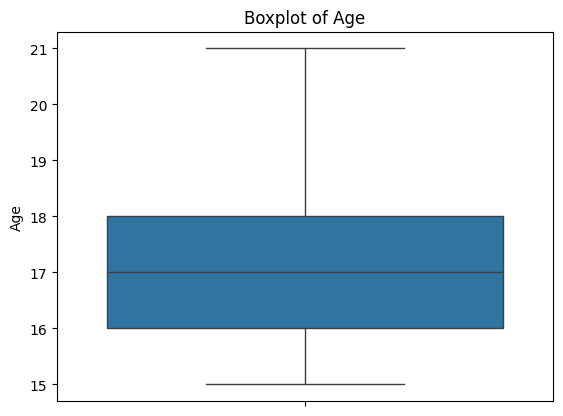

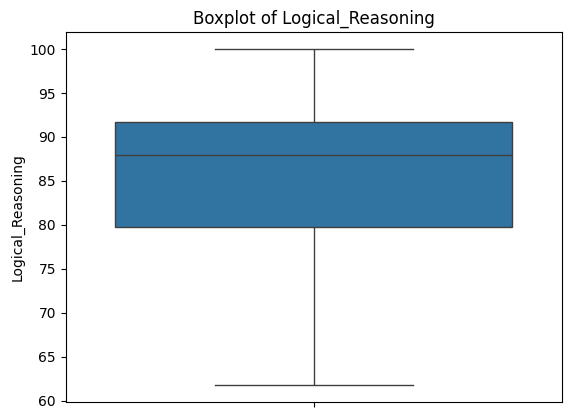

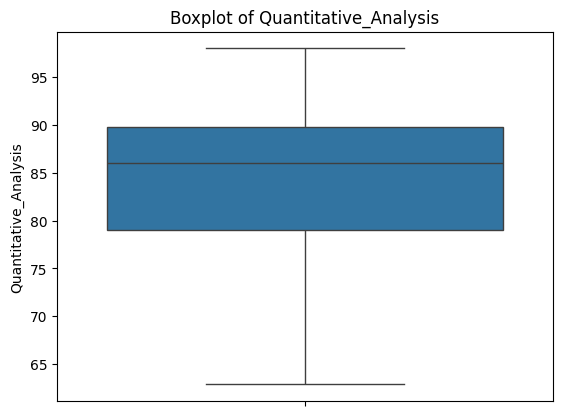

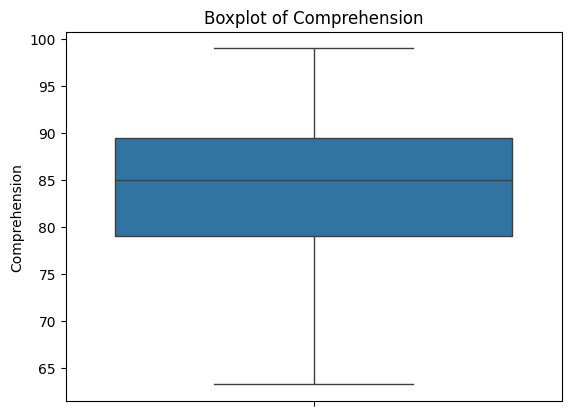

In [29]:
print("\nAfter handling Outliers:")
for column in ['Age', 'Logical_Reasoning', 'Quantitative_Analysis', 'Comprehension']:
    sns.boxplot(df[column])
    plt.title(f"Boxplot of {column}")
    plt.show()

Applying Data Transformation (log transformation for
skewness)


Before Transformation:
count     18.000000
mean      84.250000
std       11.560582
min       61.750000
25%       79.750000
50%       88.000000
75%       91.750000
max      100.000000
Name: Logical_Reasoning, dtype: float64


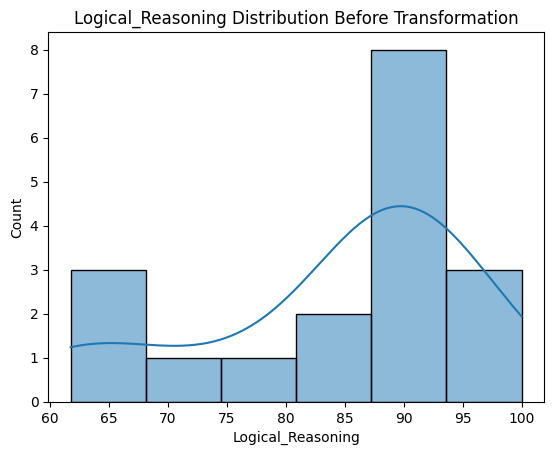


After Transformation:
count    18.000000
mean      4.435949
std       0.146706
min       4.139159
25%       4.390673
50%       4.488636
75%       4.529897
max       4.615121
Name: Logical_Reasoning_Log, dtype: float64


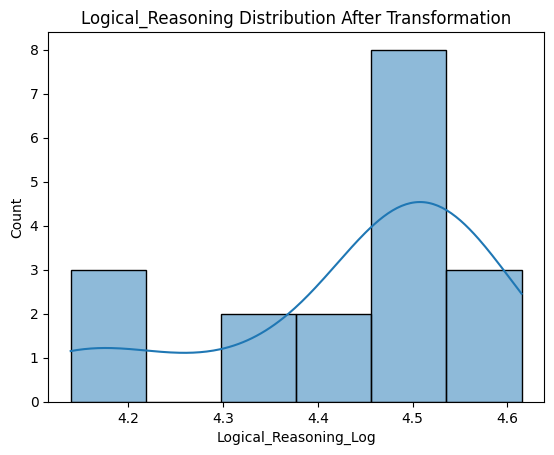

In [30]:
print("\nBefore Transformation:")
print(df['Logical_Reasoning'].describe())
sns.histplot(df['Logical_Reasoning'], kde=True)
plt.title("Logical_Reasoning Distribution Before Transformation")
plt.show()
df['Logical_Reasoning_Log'] = np.log1p(df['Logical_Reasoning'])
print("\nAfter Transformation:")
print(df['Logical_Reasoning_Log'].describe())
sns.histplot(df['Logical_Reasoning_Log'], kde=True) # kde = kernel density
plt.title("Logical_Reasoning Distribution After Transformation")
plt.show()

In [31]:
print("The Final Dataset is:")
df

The Final Dataset is:


,Student_ID,Age,Gender,Logical_Reasoning,Quantitative_Analysis,Comprehension,Logical_Reasoning_Log
0,1,16.0,Female,78.00,82.000,85.00,4.369448
1,2,17.0,Male,85.00,88.000,80.00,4.454347
2,3,15.0,Female,92.00,75.000,90.00,4.532599
3,4,18.0,Male,61.75,NaN,78.00,4.139159
4,5,19.0,Female,73.00,90.000,88.00,4.304065
5,6,NaN,Male,NaN,85.000,75.00,NaN
6,7,17.0,Female,95.00,62.875,95.00,4.564348
7,8,20.0,Male,89.00,95.000,NaN,4.499810
8,9,15.0,Female,88.00,87.000,65.00,4.488636
9,10,16.0,Male,61.75,98.000,99.00,4.139159
